# Exercise 15

# Fraud Detection

## Introduction

- Fraud Detection Dataset from Microsoft Azure: [data](http://gallery.cortanaintelligence.com/Experiment/8e9fe4e03b8b4c65b9ca947c72b8e463)

Fraud detection is one of the earliest industrial applications of data mining and machine learning. Fraud detection is typically handled as a binary classification problem, but the class population is unbalanced because instances of fraud are usually very rare compared to the overall volume of transactions. Moreover, when fraudulent transactions are discovered, the business typically takes measures to block the accounts from transacting to prevent further losses. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/15_fraud_detection.csv.zip'
df = pd.read_csv(url, index_col=0)
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [3]:
df.head()

,accountAge,digitalItemCount,sumPurchaseCount1Day,sumPurchaseAmount1Day,sumPurchaseAmount30Day,paymentBillingPostalCode - LogOddsForClass_0,accountPostalCode - LogOddsForClass_0,paymentBillingState - LogOddsForClass_0,accountState - LogOddsForClass_0,paymentInstrumentAgeInAccount,ipState - LogOddsForClass_0,transactionAmount,transactionAmountUSD,ipPostalCode - LogOddsForClass_0,localHour - LogOddsForClass_0,Label
0,2000,0,0,0.00,720.25,5.064533,0.421214,1.312186,0.566395,3279.574306,1.218157,599.00,626.164650,1.259543,4.745402,0
1,62,1,1,1185.44,2530.37,0.538996,0.481838,4.401370,4.500157,61.970139,4.035601,1185.44,1185.440000,3.981118,4.921349,0
2,2000,0,0,0.00,0.00,5.064533,5.096396,3.056357,3.155226,0.000000,3.314186,32.09,32.090000,5.008490,4.742303,0
3,1,1,0,0.00,0.00,5.064533,5.096396,3.331154,3.331239,0.000000,3.529398,133.28,132.729554,1.324925,4.745402,0
4,1,1,0,0.00,132.73,5.412885,0.342945,5.563677,4.086965,0.001389,3.529398,543.66,543.660000,2.693451,4.876771,0


In [4]:
df.shape, df.Label.sum(), df.Label.mean()

((138721, 16), 797, 0.0057453449730033666)

# Exercise 15.1

Estimate a Logistic Regression and a Decision Tree and a Random Forest

Evaluate using the following metrics:
* Accuracy
* F1-Score
* F_Beta-Score (Beta=10)

Comment about the results

partir la base de datos en train and test, semilla 42

In [5]:
X=df.drop('Label', axis=1)
y=df.Label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
logreg = LogisticRegression(solver='liblinear',C=1e9, max_iter=300)
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
Random = RandomForestClassifier(n_estimators=20, random_state=0)

In [7]:
logreg.fit(X, y)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=300,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [8]:
y_pred_lor = logreg.predict(X_test)

In [9]:
treeclf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [10]:
y_pred_dt = treeclf.predict(X_test)

In [11]:
Random.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
y_pred_rf = Random.predict(X_test)

# Accuracy

In [13]:
from sklearn.metrics import accuracy_score
print('logistic',accuracy_score(y_test, y_pred_lor))
print('DesicionTree',accuracy_score(y_test, y_pred_dt))
print('Random',accuracy_score(y_test, y_pred_rf))

logistic 0.994112982675349
DesicionTree 0.9941610399596319
Random 0.9989907970300599


# F1-Score

In [14]:
from sklearn.metrics import f1_score
print('logistic',f1_score(y_test, y_pred_lor, average=None))
print('DesicionTree',f1_score(y_test, y_pred_dt, average=None))
print('Random',f1_score(y_test, y_pred_rf, average=None))

logistic [0.9970478 0.       ]
DesicionTree [0.99707169 0.03187251]
Random [0.99949266 0.90666667]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# F-Beta Score

In [15]:
from sklearn.metrics import fbeta_score
print('logistic',fbeta_score(y_test, y_pred_lor, average=None, beta=10))
print('DesicionTree',fbeta_score(y_test, y_pred_dt, average=None, beta=10))
print('Random',fbeta_score(y_test, y_pred_rf, average=None, beta=10))

logistic [0.99994137 0.        ]
DesicionTree [0.99989447 0.01648576]
Random [0.99996626 0.83400121]


In [30]:
models = {'lr': LogisticRegression(solver='lbfgs', max_iter=200),
          'dt': DecisionTreeClassifier(max_depth=3, random_state=1),
          'rf': RandomForestClassifier(n_estimators=100, random_state=0)}

In [31]:
for model in models.keys():
    models[model].fit(X, y)
    print(model, 'accuracy score:{:.3f}'.format(accuracy_score(models[model].predict(X_test),y_test)),
          'f1_score:{:.3f}'.format(f1_score(models[model].predict(X_test),y_test)),
         'fbeta_score:{:.3f}'.format(fbeta_score(models[model].predict(X_test),y_test,beta=10)))9

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


lr accuracy score:0.994 f1_score:0.000 fbeta_score:0.000
dt accuracy score:0.994 f1_score:0.032 fbeta_score:0.478
rf accuracy score:1.000 f1_score:0.973 fbeta_score:0.999


# Exercise 15.2

Under-sample the negative class using random-under-sampling

Which is parameter for target_percentage did you choose?
How the results change?

**Only apply under-sampling to the training set, evaluate using the whole test set**

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_vis = pca.fit_transform(X)

In [33]:
def plot_two_classes(X, y, subplot=False, size=(10, 10)):
    # Plot the two classes
    if subplot == False:
        fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=size)
        
    subplot.scatter(X[y==0, 0], X[y==0, 1], label="Class #0", 
                    alpha=0.5, s=70)
    subplot.scatter(X[y==1, 0], X[y==1, 1], label="Class #1", 
                    alpha=0.5, s=70)
    subplot.legend()
    return subplot

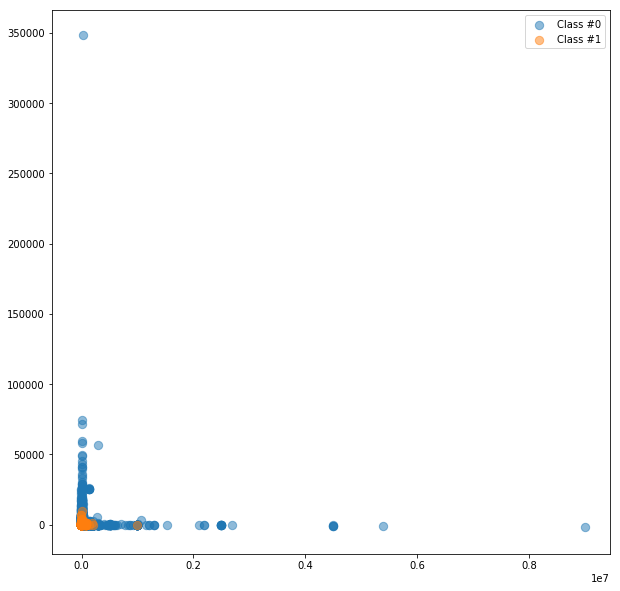

In [34]:
import matplotlib.pyplot as plt
plot_two_classes(x_vis, y)

In [35]:
n_samples = y.shape[0]
print(n_samples)

138721


In [36]:
n_samples_0 = (y == 0).sum()
n_samples_0

137924

In [37]:
n_samples_1 = (y == 1).sum()
n_samples_1

797

In [38]:
n_samples_1 / n_samples

0.0057453449730033666

In [39]:
n_samples_0_new =  n_samples_1 / 0.5 - n_samples_1
n_samples_0_new

797.0

In [40]:
n_samples_0_new_per = n_samples_0_new / n_samples_0
n_samples_0_new_per

0.005778544705779994

In [41]:
filter_ = y == 0

# Random sample
np.random.seed(42)
rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)

# Combine
filter_ = filter_ & rand_1

In [42]:
filter_.sum()

757

In [43]:
filter_ = filter_ | (y == 1)

In [44]:
filter_ = filter_.astype(bool)

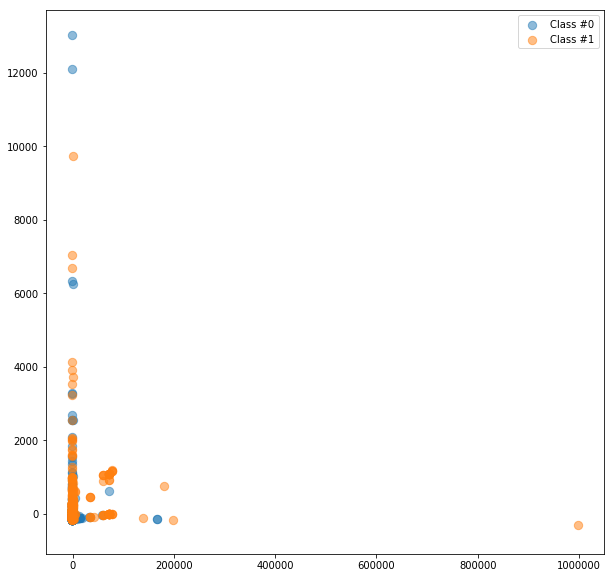

In [45]:
plot_two_classes(x_vis[filter_], y[filter_])

In [46]:
def UnderSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_0_new =  n_samples_1 / target_percentage - n_samples_1
    n_samples_0_new_per = n_samples_0_new / n_samples_0

    filter_ = y == 0

    np.random.seed(seed)
    rand_1 = np.random.binomial(n=1, p=n_samples_0_new_per, size=n_samples)
    
    filter_ = filter_ & rand_1
    filter_ = filter_ | (y == 1)
    filter_ = filter_.astype(bool)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  8000 y.mean() =  0.099625


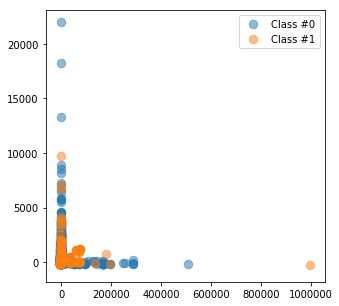

Target percentage 0.2
y.shape =  3992 y.mean() =  0.19964929859719438


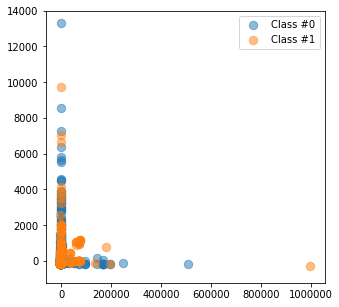

Target percentage 0.3
y.shape =  2615 y.mean() =  0.30478011472275335


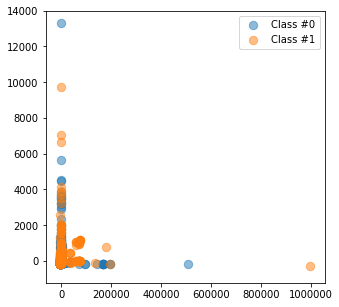

Target percentage 0.4
y.shape =  1956 y.mean() =  0.4074642126789366


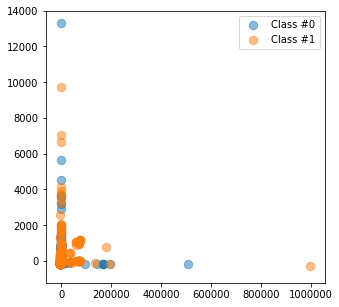

Target percentage 0.5
y.shape =  1585 y.mean() =  0.5028391167192429


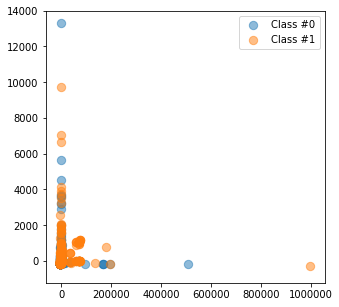

In [47]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = UnderSampling(x_vis, y, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()  

Se deja Target_percentaje de 0.1 permite 8000 observaciones de la minoria, equilibrando mejor la muestra.

In [48]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    print(model, 'accuracy score:{:.3f}'.format(accuracy_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test)),
          'f1_score:{:.3f}'.format(f1_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test)),
         'fbeta_score:{:.3f}'.format(fbeta_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test,beta=10)))

lr accuracy score:0.796 f1_score:0.017 fbeta_score:0.009
dt accuracy score:0.642 f1_score:0.015 fbeta_score:0.008
rf accuracy score:0.889 f1_score:0.015 fbeta_score:0.008


# Exercise 15.3

Same analysis using random-over-sampling

In [49]:
import random
def OverSampling(X, y, target_percentage=0.5, seed=None):
    # Assuming minority class is the positive
    n_samples = y.shape[0]
    n_samples_0 = (y == 0).sum()
    n_samples_1 = (y == 1).sum()

    n_samples_1_new =  -target_percentage * n_samples_0 / (target_percentage- 1)

    np.random.seed(seed)
    filter_ = np.random.choice(X[y == 1].shape[0], int(n_samples_1_new))
    # filter_ is within the positives, change to be of all
    filter_ = np.nonzero(y == 1)[0][filter_]
    
    filter_ = np.concatenate((filter_, np.nonzero(y == 0)[0]), axis=0)
    
    return X[filter_], y[filter_]

Target percentage 0.1
y.shape =  153248 y.mean() =  0.09999477970348716


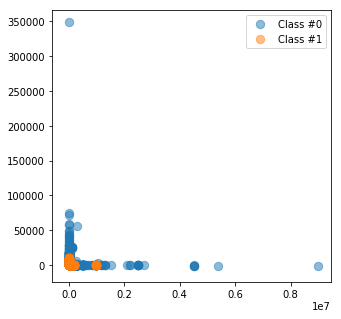

Target percentage 0.2
y.shape =  172405 y.mean() =  0.2


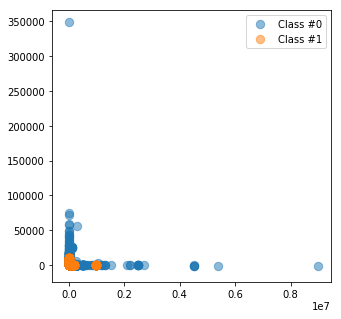

Target percentage 0.3
y.shape =  197034 y.mean() =  0.29999898494676047


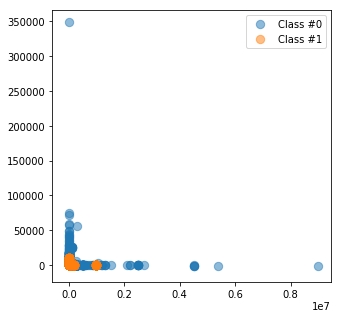

Target percentage 0.4
y.shape =  229873 y.mean() =  0.3999991299543661


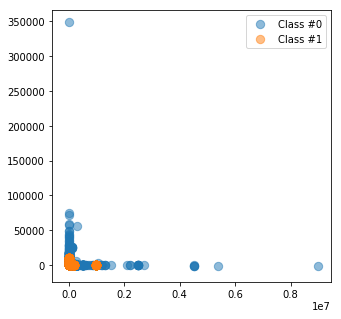

Target percentage 0.5
y.shape =  275848 y.mean() =  0.5


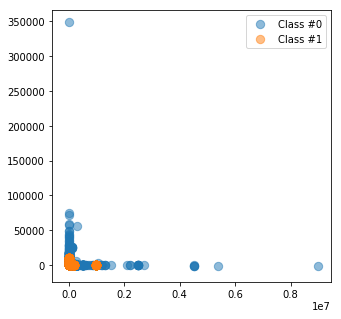

In [50]:
for target_percentage in [0.1, 0.2, 0.3, 0.4, 0.5]:
    X_u, y_u = OverSampling(x_vis, y, target_percentage, 1)
    print('Target percentage', target_percentage)
    print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
    plot_two_classes(X_u, y_u, size=(5, 5))
    plt.show()    #las azules se replicaron 9 veces dejando 1800 observaciones azules

In [51]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    print(model, 'accuracy score:{:.3f}'.format(accuracy_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test)),
          'f1_score:{:.3f}'.format(f1_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test)),
         'fbeta_score:{:.3f}'.format(fbeta_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test,beta=10)))

lr accuracy score:0.793 f1_score:0.017 fbeta_score:0.009
dt accuracy score:0.672 f1_score:0.015 fbeta_score:0.008
rf accuracy score:0.994 f1_score:0.000 fbeta_score:0.000


# Exercise 15.4 (3 points)

Evaluate the results using SMOTE

Which parameters did you choose?

In [52]:
k = 5

from sklearn.neighbors import NearestNeighbors
nearest_neighbour_ = NearestNeighbors(n_neighbors=k + 1)
nearest_neighbour_.fit(x_vis[y==1])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=6, p=2, radius=1.0)

In [53]:
nns = nearest_neighbour_.kneighbors(x_vis[y==1], 
                                    return_distance=False)[:, 1:]

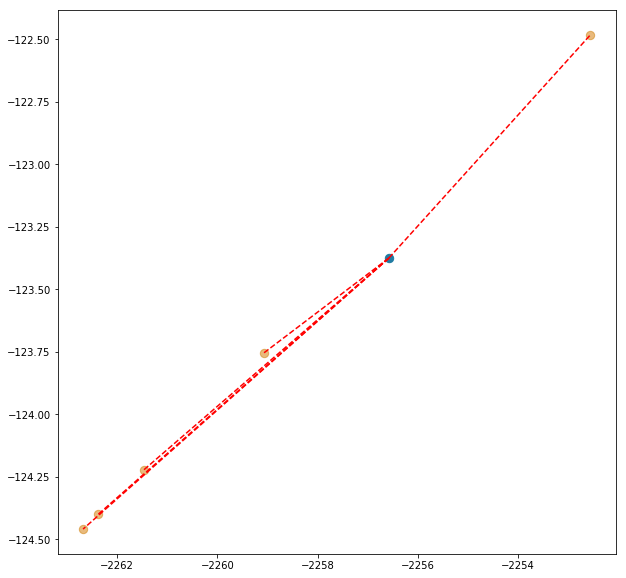

In [54]:
def base_smote_plot(sel, nns):
    fig, subplot = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    
    for i in range(len(sel)):
        # plot the select sample
        subplot.scatter(x_vis[y==1, 0][sel[i]], x_vis[y==1, 1][sel[i]],
                alpha=1., s=70)
        # plot the neighbors
        subplot.scatter(x_vis[y==1, 0][nns[sel[i]]], 
                        x_vis[y==1, 1][nns[sel[i]]],
                        alpha=0.5, s=70) 
        
        # plot the lines
        for nn in nns[sel[i]]:
            plt.plot([x_vis[y==1, 0][sel[i]], x_vis[y==1, 0][nn]],  
                     [x_vis[y==1, 1][sel[i]], x_vis[y==1, 1][nn]],
                     'r--') 
    
    xlim = subplot.get_xlim()
    ylim = subplot.get_ylim()
    subplot.scatter(x_vis[y==1, 0], x_vis[y==1, 1], alpha=0.1, s=70)
    subplot.set_xlim(xlim)
    subplot.set_ylim(ylim)
    return subplot
base_smote_plot([12],nns)

In [55]:
def SMOTE(X, y, target_percentage=0.5, k=5, seed=None):
    
    # New samples
    n_samples_1_new =  int(-target_percentage * n_samples_0 / (target_percentage- 1) - n_samples_1)
    
    # A matrix to store the synthetic samples
    new = np.zeros((n_samples_1_new, x_vis.shape[1]))
    
    # Create seeds
    np.random.seed(seed)
    seeds = np.random.randint(1, 1000000, 3)
    
    # Select examples to use as base
    np.random.seed(seeds[0])
    sel_ = np.random.choice(y[y==1].shape[0], n_samples_1_new)
    
    # Define random seeds (2 per example)
    np.random.seed(seeds[1])
    nn__ = np.random.choice(k, n_samples_1_new)
    np.random.seed(seeds[2])
    steps = np.random.uniform(size=n_samples_1_new)  

    # For each selected examples create one synthetic case
    for i, sel in enumerate(sel_):
        # Select neighbor
        nn_ = nn__[i]
        step = steps[i]
        # Create new sample
        new[i, :] = X[y==1][sel] - step * (X[y==1][sel] - X[y==1][nn_])
    
    X = np.vstack((X, new))
    y = np.append(y, np.ones(n_samples_1_new))
    
    return X, y

Target percentage 0.25 k  5
y.shape =  183898 y.mean() =  0.24999728110148017


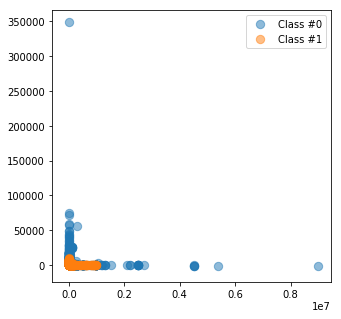

Target percentage 0.25 k  15
y.shape =  183898 y.mean() =  0.24999728110148017


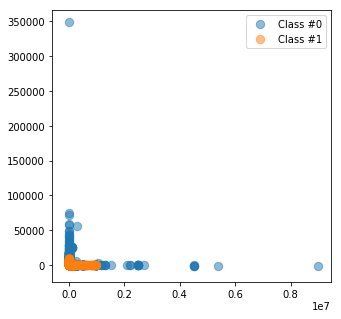

Target percentage 0.5 k  5
y.shape =  275848 y.mean() =  0.5


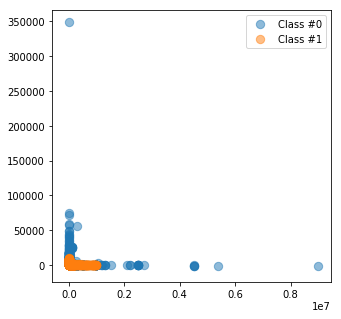

Target percentage 0.5 k  15
y.shape =  275848 y.mean() =  0.5


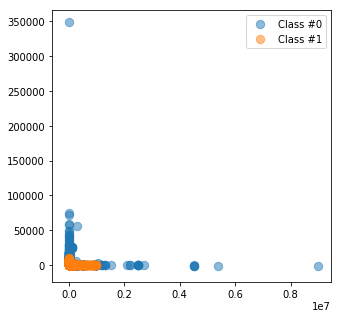

In [56]:
for target_percentage in [0.25, 0.5]:
    for k in [5, 15]:
        X_u, y_u = SMOTE(x_vis, y, target_percentage, k, seed=3)
        print('Target percentage', target_percentage, 'k ', k)
        print('y.shape = ',y_u.shape[0], 'y.mean() = ', y_u.mean())
        plot_two_classes(X_u, y_u, size=(5, 5))
        plt.show()    

In [57]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    print(model, 'accuracy score:{:.3f}'.format(accuracy_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test)),
          'f1_score:{:.3f}'.format(f1_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test)),
         'fbeta_score:{:.3f}'.format(fbeta_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test,beta=10)))

lr accuracy score:0.783 f1_score:0.020 fbeta_score:0.010
dt accuracy score:0.698 f1_score:0.012 fbeta_score:0.006
rf accuracy score:0.838 f1_score:0.015 fbeta_score:0.008


# Exercise 15.5 (3 points)

Evaluate the results using Adaptive Synthetic Sampling Approach for Imbalanced
Learning (ADASYN)

http://www.ele.uri.edu/faculty/he/PDFfiles/adasyn.pdf
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.ADASYN.html#rf9172e970ca5-1

In [58]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\lenovo\anaconda3\lib\site-packages (0.4.3)


In [59]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=42)
X_u,y_u=ada.fit_resample(x_vis, y)

In [60]:
for model in models.keys():
    models[model].fit(X_u, y_u)
    print(model, 'accuracy score:{:.3f}'.format(accuracy_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test)),
          'f1_score:{:.3f}'.format(f1_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test)),
         'fbeta_score:{:.3f}'.format(fbeta_score(models[model].predict(PCA(n_components=2).fit_transform(X_test)),y_test,beta=10)))

lr accuracy score:0.783 f1_score:0.018 fbeta_score:0.010
dt accuracy score:0.654 f1_score:0.015 fbeta_score:0.008
rf accuracy score:0.964 f1_score:0.023 fbeta_score:0.014


# Exercise 15.6 (3 points)

Compare and comment about the results #usar  una tabla de resumen

en cuanto a los modelos de balance de la muestra considero mejor oversampling sea con adasyn o smote debido a que estos metodos no tienen inconveniente cuando se trata de sobreajuste y generaron mejores resulados